In [1]:
import sys
sys.path.append("./../")

import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

from modules.vqvae.model import VQVAE
from datasets.cub import CubDataset
from datasets.common import collate_fn
from config import Config

In [19]:
def show(img, figsize=(14, 10)):
    plt.figure(figsize=figsize)
    npimg = img.numpy()
    fig = plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

In [3]:
CONFIG = Config(local=True, model_path="models/vqvae_i128_e256x8192_lr_split/")
CONFIG.load_config()

CONFIG.BATCH_SIZE = 8

train_dataset = CubDataset(root_img_path=CONFIG.root_img_path,
                           root_text_path=CONFIG.root_text_path,
                           imgs_list_file_path=CONFIG.imgs_list_file_path,
                           img_size=CONFIG.img_size)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=CONFIG.BATCH_SIZE,
                          shuffle=True,
                          collate_fn=collate_fn)

In [ ]:
model = VQVAE(num_embeddings=CONFIG.vqvae_num_embeddings,
              embedding_dim=CONFIG.vqvae_embedding_dim,
              commitment_cost=CONFIG.vqvae_commitment_cost,
              decay=CONFIG.vqvae_decay,
              num_x2downsamples=CONFIG.vqvae_num_x2downsamples,
              num_resid_downsample_layers=CONFIG.vqvae_num_downsample_residual_layers,
              num_resid_bottleneck_layers=CONFIG.vqvae_num_bottleneck_residual_layers,
              use_batch_norm=True,
              use_conv1x1=True)

model.load_model(root_path=CONFIG.save_model_path, model_name="VQVAE")
_ = model.eval()

In [11]:
imgs, _ = next(iter(train_loader))

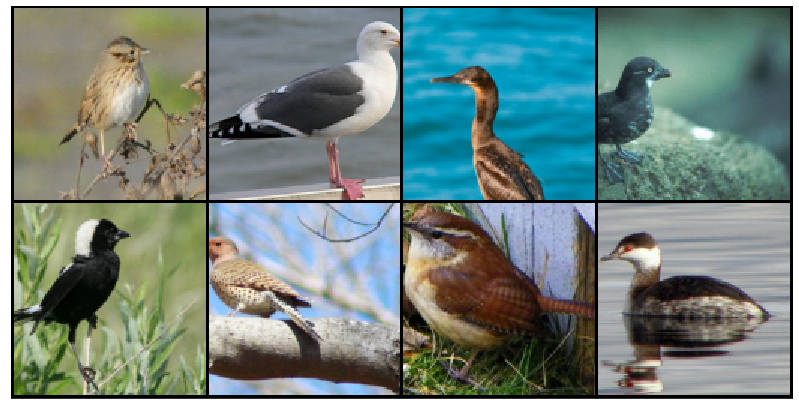

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


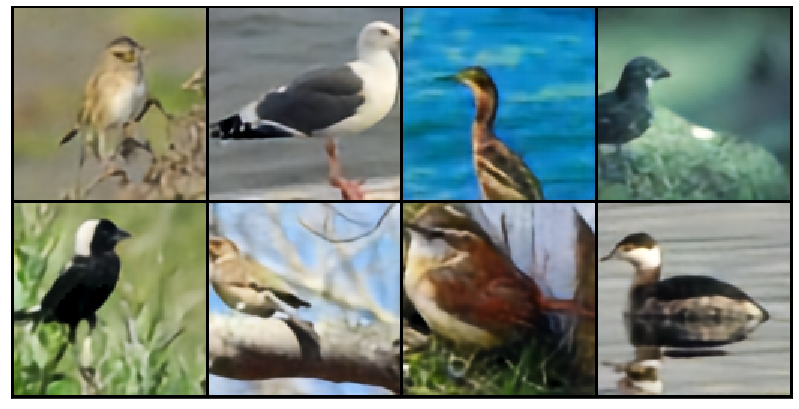

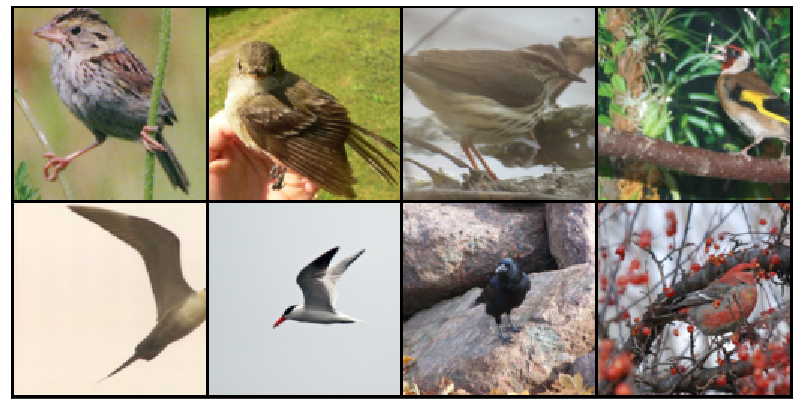

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


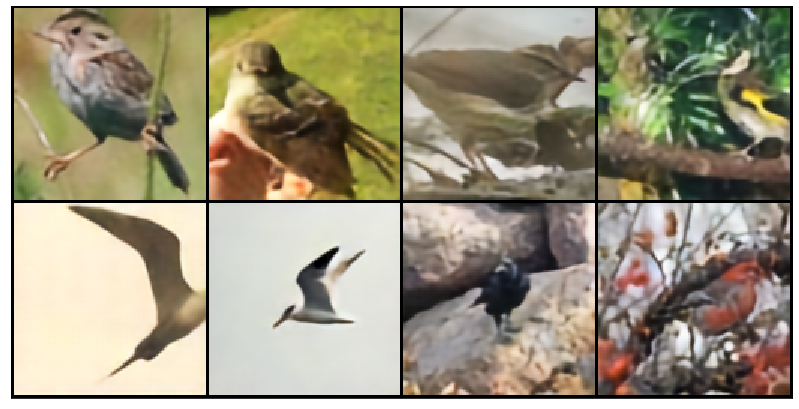

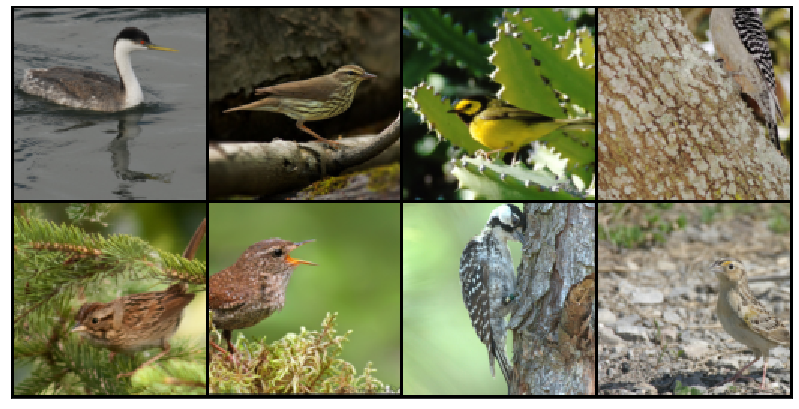

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


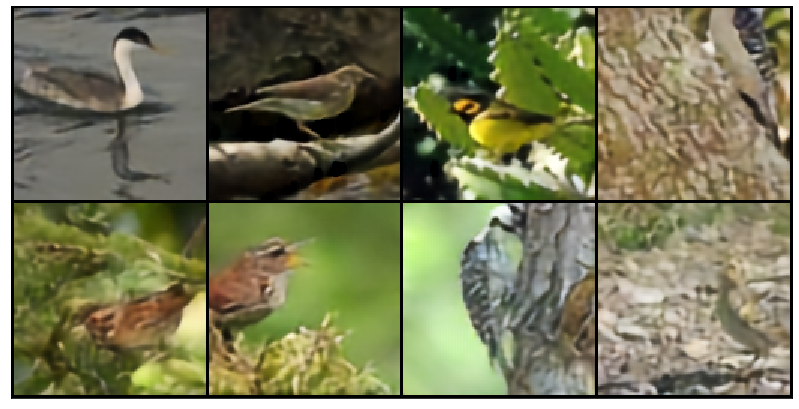

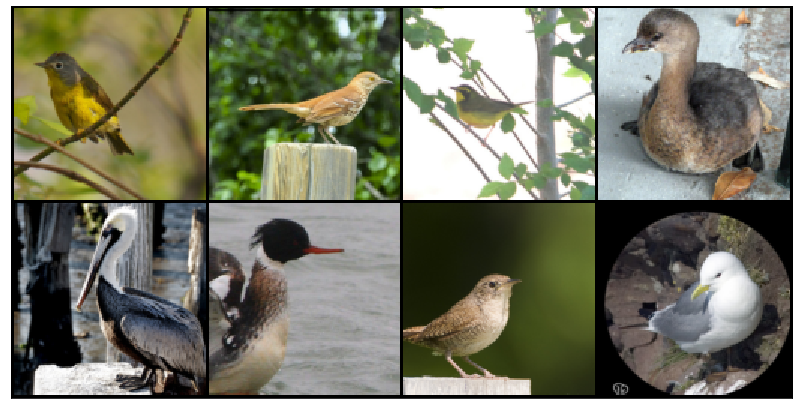

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


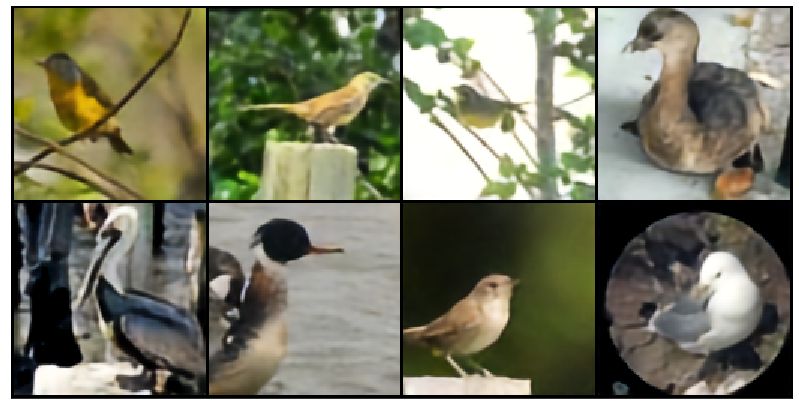

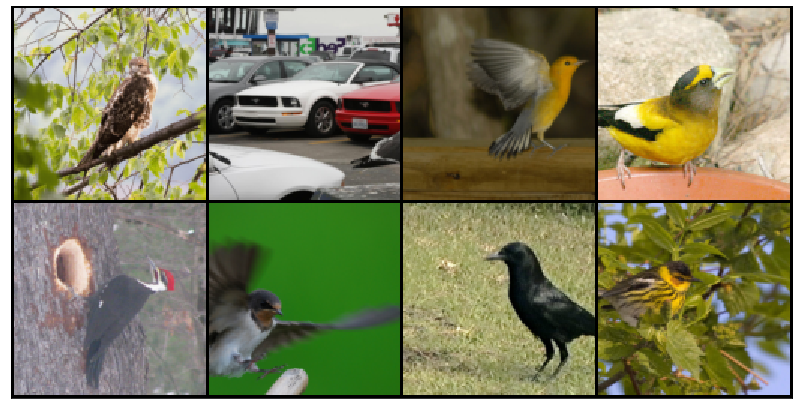

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


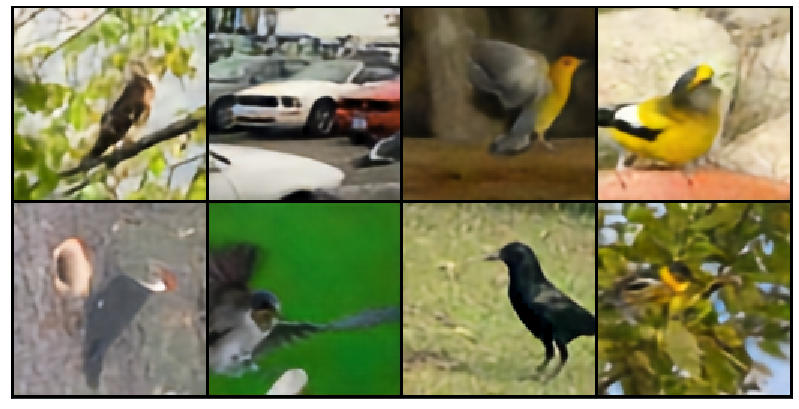

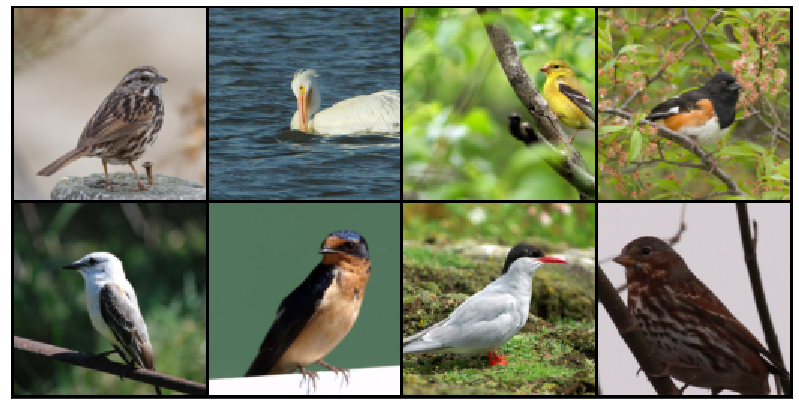

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


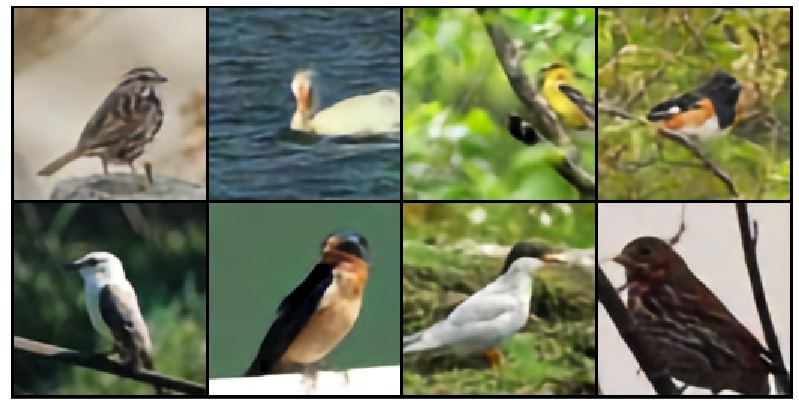

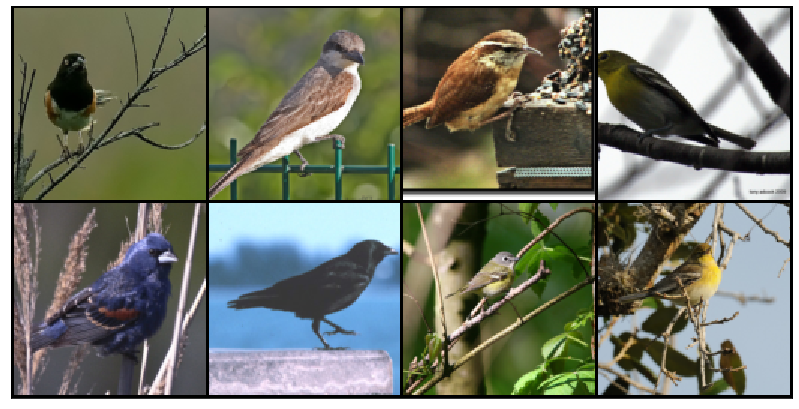

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


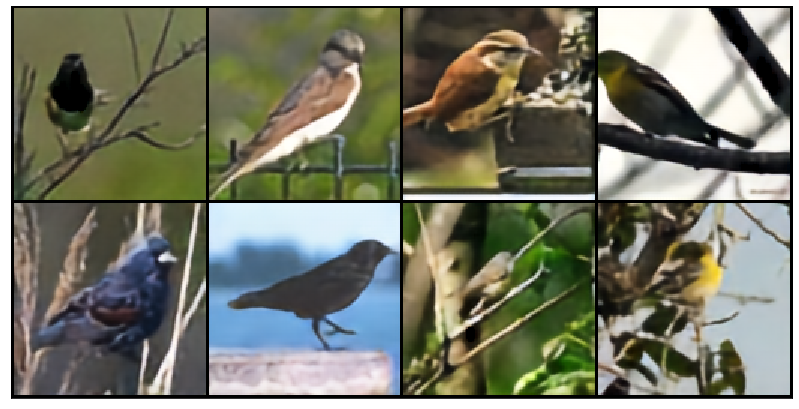

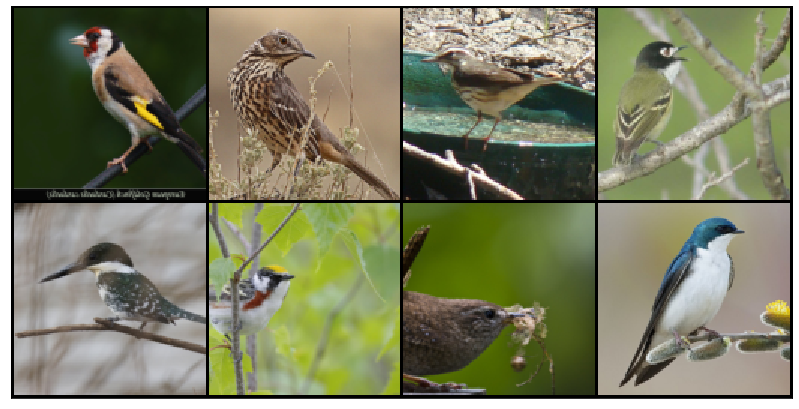

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


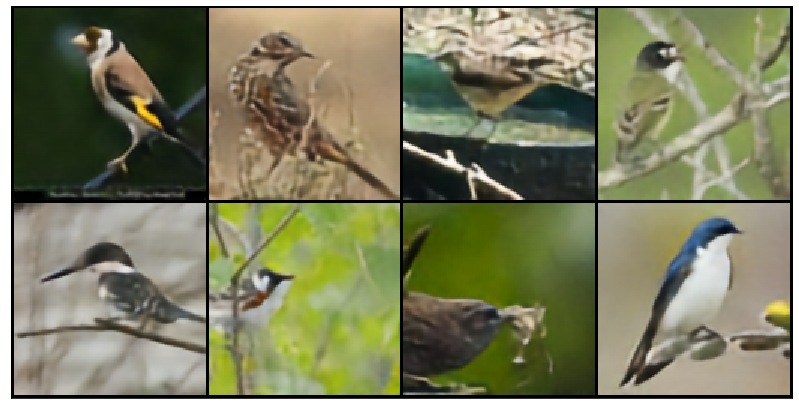

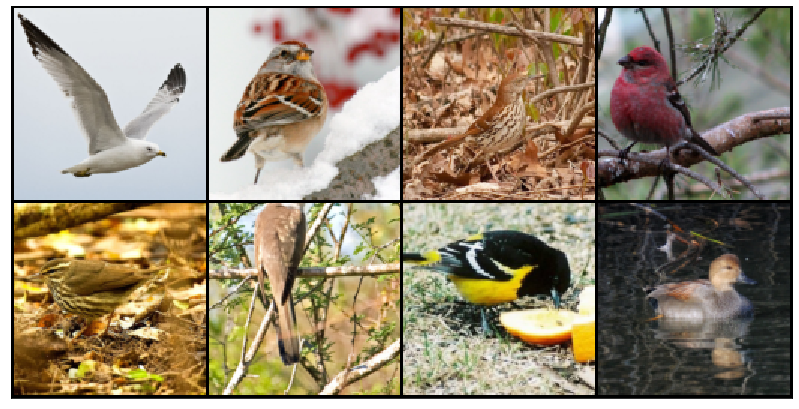

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


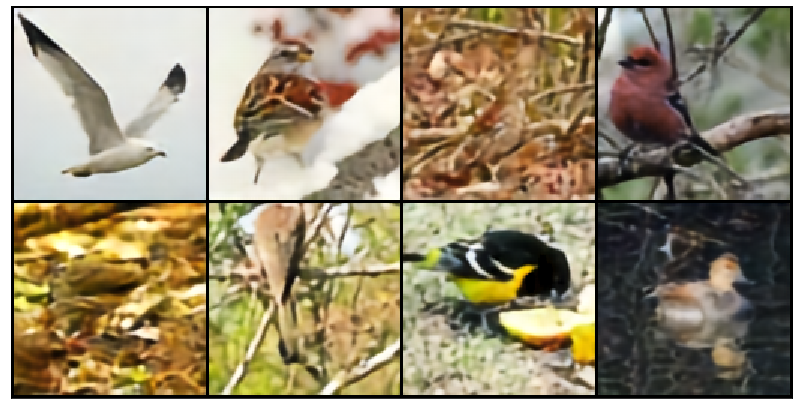

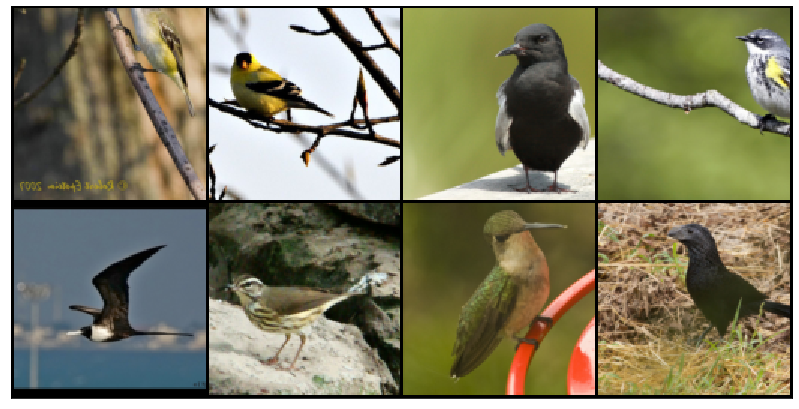

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


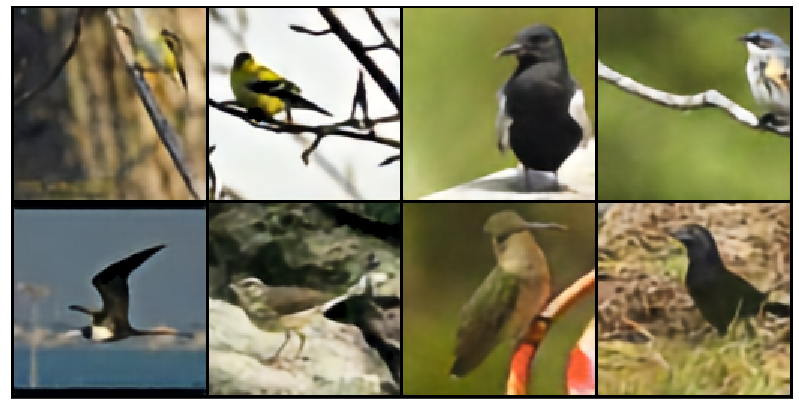

In [20]:
for i in range(10):
    
    imgs, _ = next(iter(train_loader))

    show(make_grid(imgs.data, nrow=4))

    _, quantized, x_recon, _ = model(imgs)

    show(make_grid(x_recon.data, nrow=4))

In [15]:
quantized, (encodings, encoding_codes) = model.encode_and_quantize(imgs)
quantized.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


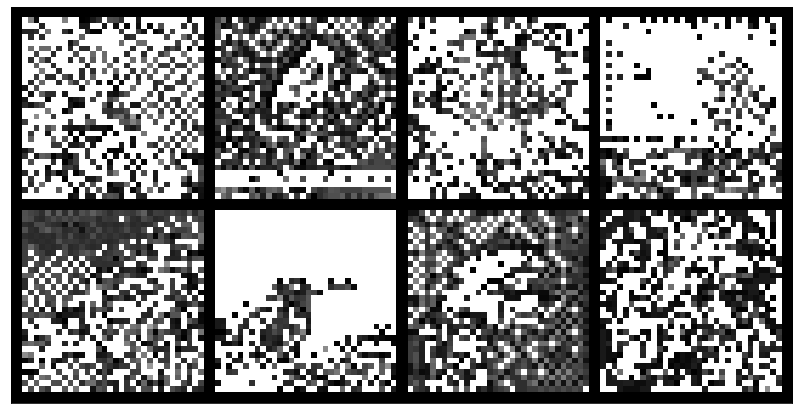

In [17]:
show(make_grid(encoding_codes.unsqueeze(1).data, nrow=4))

In [25]:
t = torch.ones((5,5))
t[2,3] = 0

In [36]:
torch.tensor(60.).exp()

tensor(1.1420e+26)